In [1]:

from typing import List
import mhn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial
import scipy.cluster
import RandomMHNGenerator as rmg
import ClusterableMhnGenerator as cmg
import EventDistanceMeasurer as edm
import mhn_tools


#sampled_data=cl_generator.getMHN().sample_artificial_data(100000, as_dataframe=True)

c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(12345)

cl_generator = cmg.ClusterableMhnGenerator(3,5)
rand_generator = rmg.RandomMHNGenerator(cl_generator.getEvents())
rand_generator.loadfrom("mbonart_checkpoints/rmg1")
cl_generator.setClusterMHN(rand_generator.getMHN())
cl_generator.splitClusters([2,3,4,1,4])
cl_generator.randomizeBaseRates()   #leave out this line for already computed results

test_events = cl_generator.getEvents(cmg.DOM.TEST)
events = cl_generator.getEvents(cmg.DOM.CLUSTER)

sampled_datas:List[pd.DataFrame]=[]

dist_measurers = []
noisy_mhns: List[mhn.model.cMHN]=[]

noise_steps=10
noise_inc=0.1

for i in range(noise_steps):
    noisy_mhn = mhn_tools.copyMHN(cl_generator.getMHN())
    sampled_data=noisy_mhn.sample_artificial_data(100000, as_dataframe=True)
    noisy_mhns.append(noisy_mhn)
    sampled_datas.append(sampled_data)
    cl_generator.addNoiseOffDiags(noise_inc)
    

#for noisy_mhn in noisy_mhns:
#    noisy_mhn.plot()






loading from mbonart_checkpoints/rmg1/mhn_SET
loading from mbonart_checkpoints/rmg1/mhn_TRAINED


In [3]:
for i, sampled_data in enumerate(sampled_datas):
    
    dist_measurer=edm.EventDistanceMeasurerCP(test_events, events)

    dist_measurer.load_data(sampled_data)
    dist_measurer.train_All_MHNs(identifier=f"noise{i*noise_inc}__")
    dist_measurer.compute_distance_matrix(edm.DIST.OFFDIAG_EUCLID)

    dist_measurers.append(dist_measurer)

0x1.7ccf144b235a1p+61
Directory for storage is edm_noise0.0__7ccf144b235a1
check if mbonart_checkpoints/edm_noise0.0__7ccf144b235a1   does exist
get func for DistMeasure.OFFDIAG_EUCLID
Distance function: <function euclid_dist_offdiag at 0x000002215331BE20>
0x1.a6ed8edb4ef93p+63
Directory for storage is edm_noise0.1__a6ed8edb4ef93
check if mbonart_checkpoints/edm_noise0.1__a6ed8edb4ef93   does exist
get func for DistMeasure.OFFDIAG_EUCLID
Distance function: <function euclid_dist_offdiag at 0x000002215331BE20>
0x1.1d528f9b73987p+62
Directory for storage is edm_noise0.2__1d528f9b73987
check if mbonart_checkpoints/edm_noise0.2__1d528f9b73987   does exist
get func for DistMeasure.OFFDIAG_EUCLID
Distance function: <function euclid_dist_offdiag at 0x000002215331BE20>
0x1.07187279acfa5p+63
Directory for storage is edm_noise0.30000000000000004__07187279acfa5
check if mbonart_checkpoints/edm_noise0.30000000000000004__07187279acfa5   does exist
get func for DistMeasure.OFFDIAG_EUCLID
Distance fun

Noise 0.0:


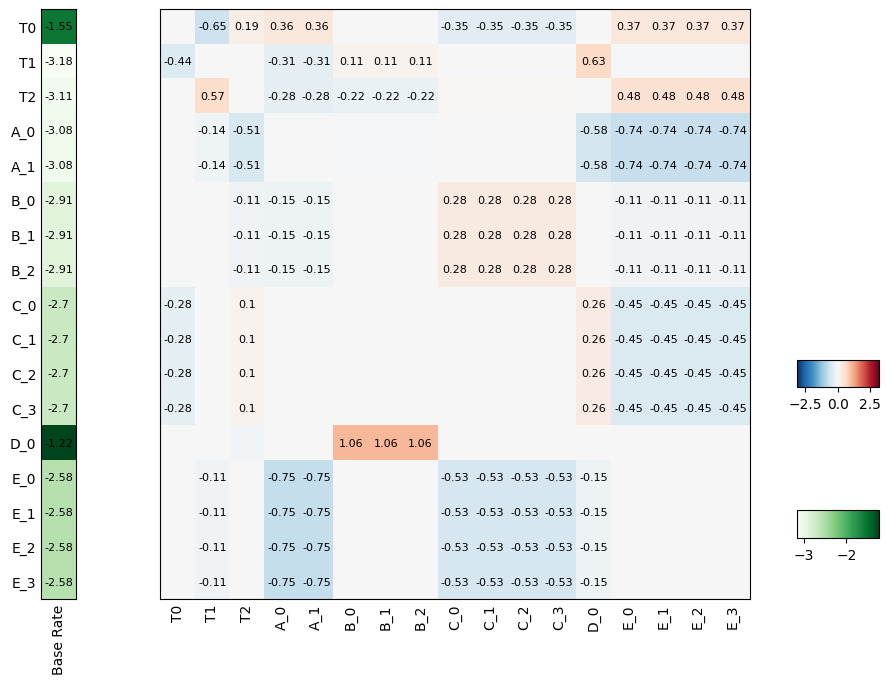

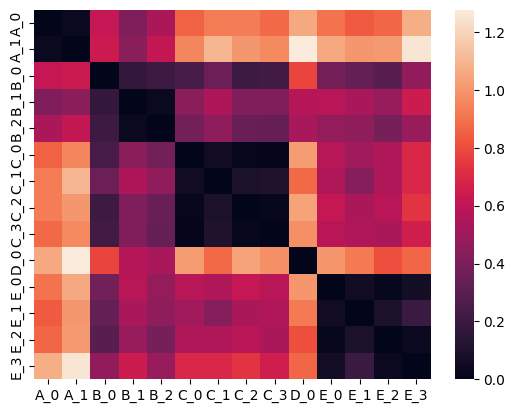

C:\Users\michi\AppData\Local\Temp\ipykernel_28936\636595382.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)


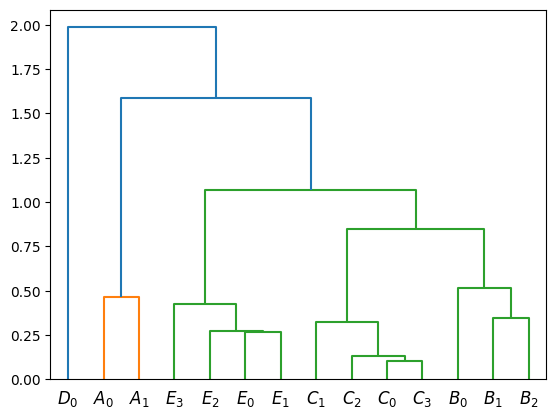

Noise 0.1:


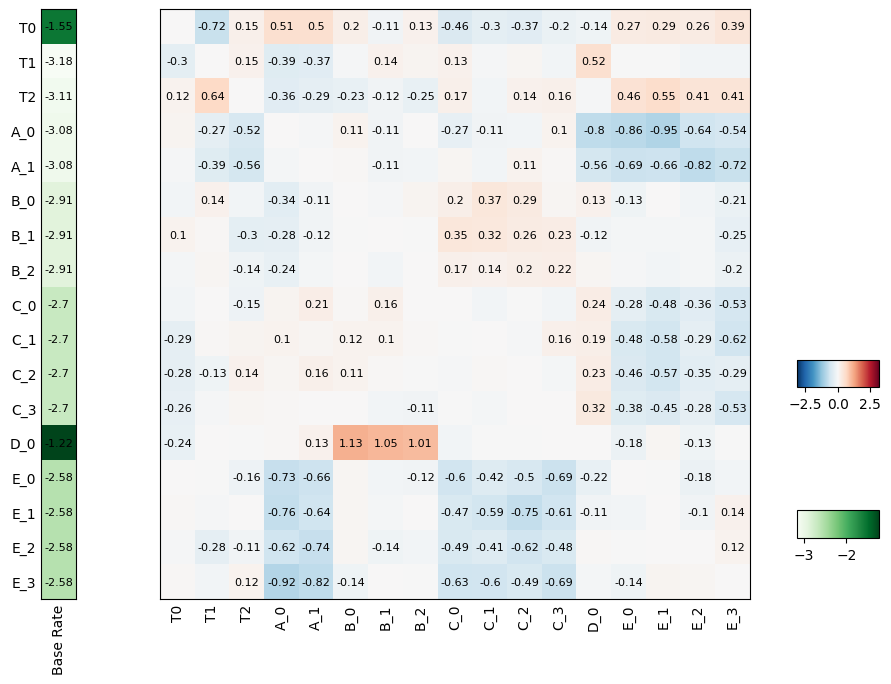

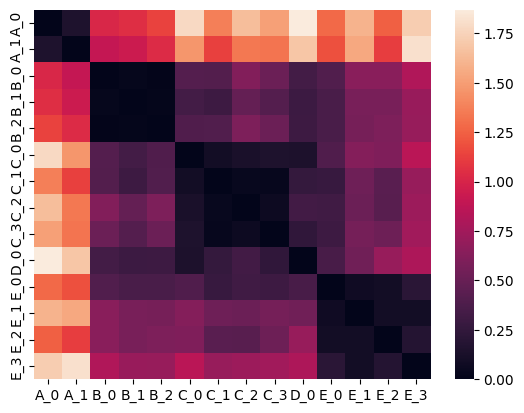

C:\Users\michi\AppData\Local\Temp\ipykernel_28936\636595382.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)


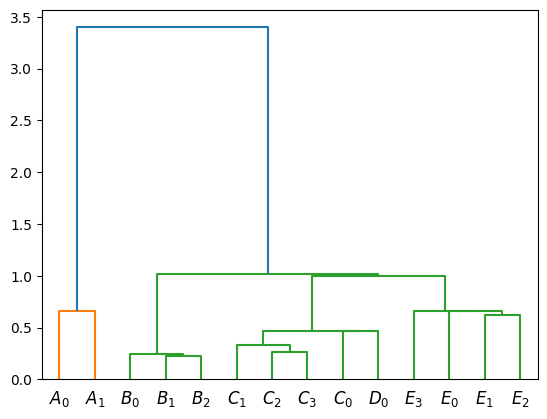

Noise 0.2:


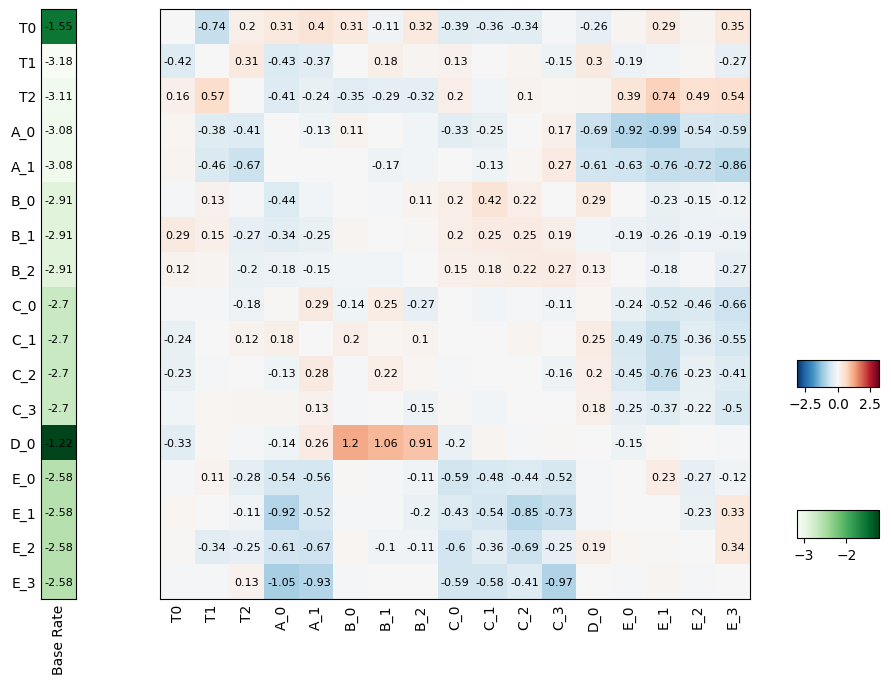

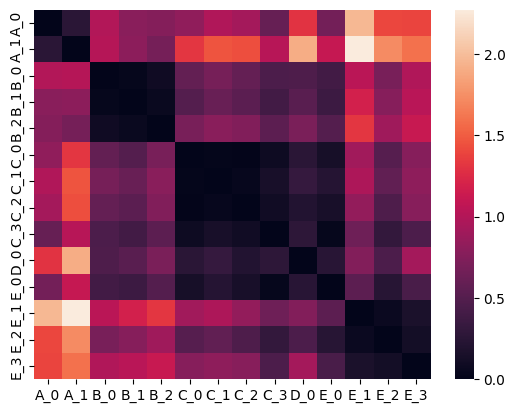

C:\Users\michi\AppData\Local\Temp\ipykernel_28936\636595382.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)


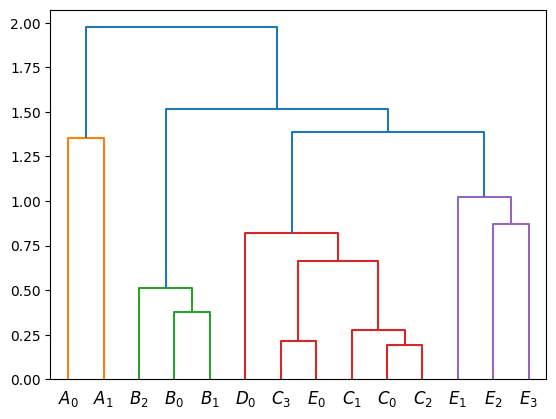

Noise 0.30000000000000004:


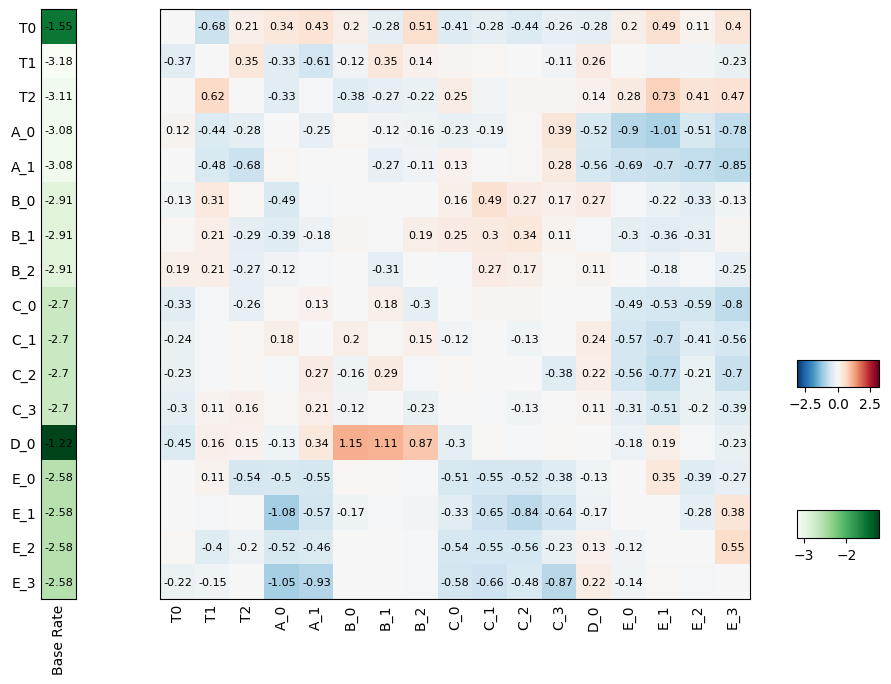

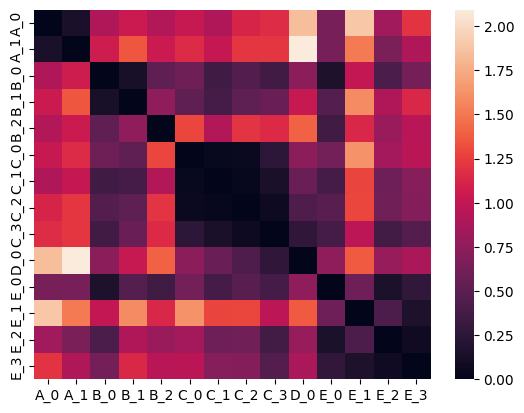

C:\Users\michi\AppData\Local\Temp\ipykernel_28936\636595382.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)


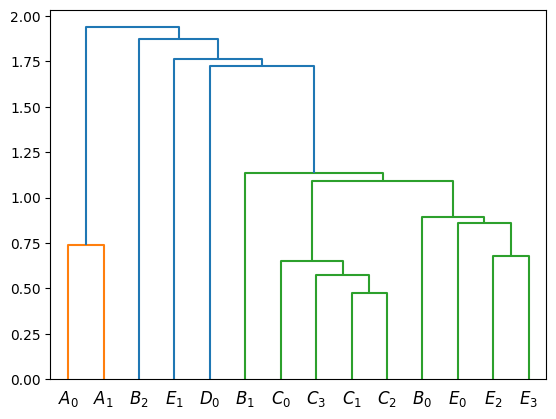

Noise 0.4:


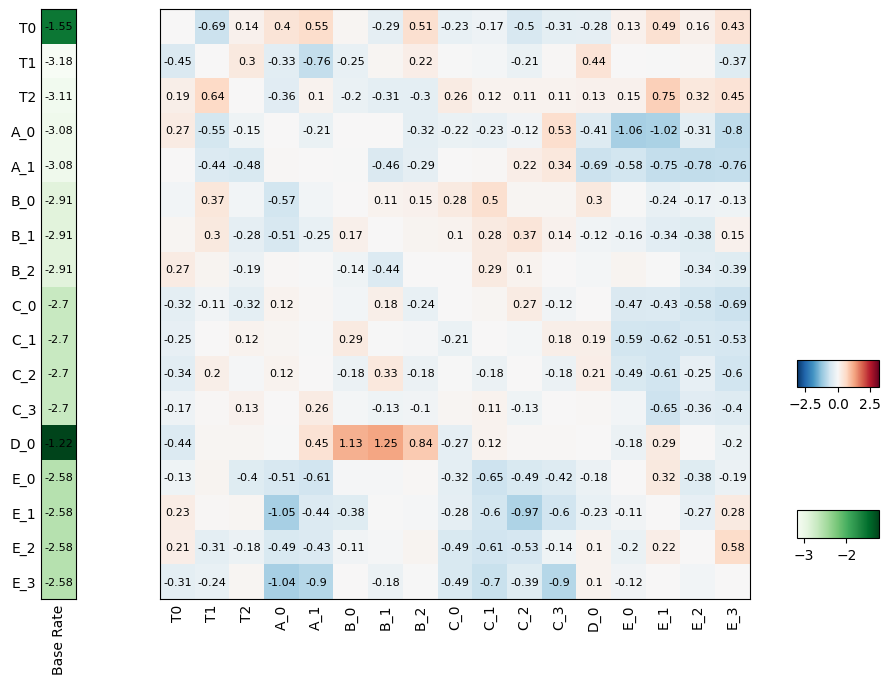

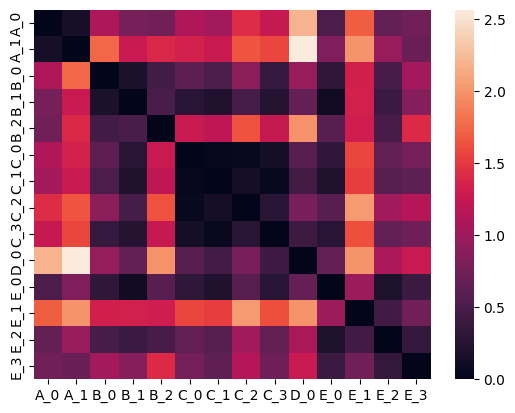

C:\Users\michi\AppData\Local\Temp\ipykernel_28936\636595382.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)


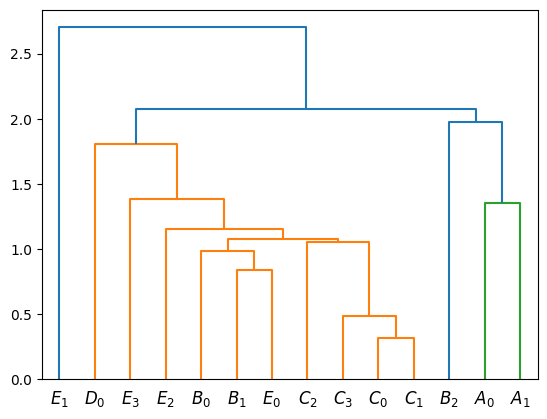

Noise 0.5:


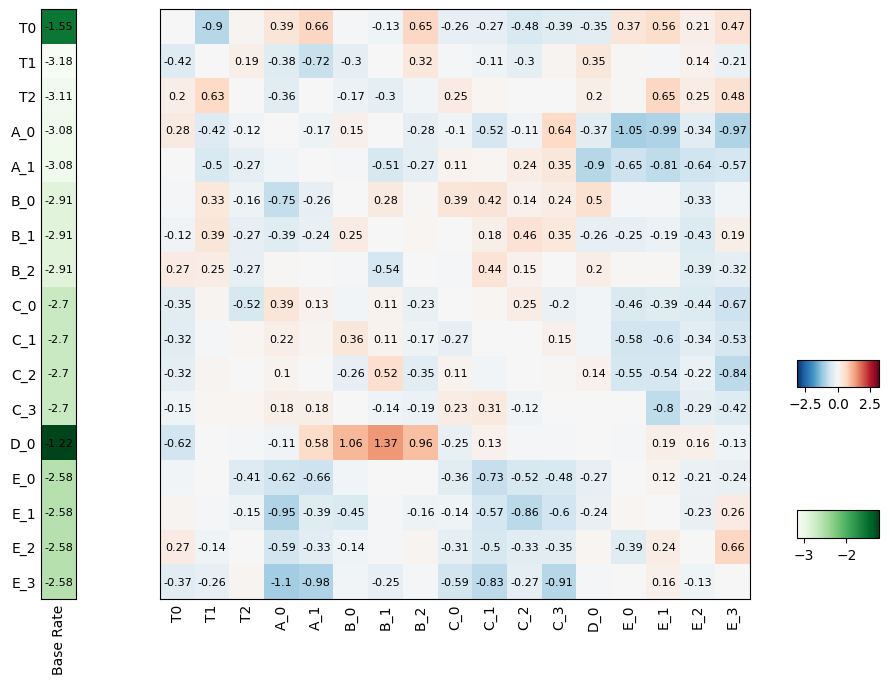

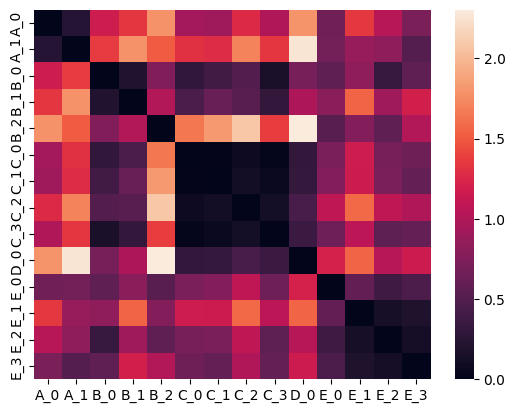

C:\Users\michi\AppData\Local\Temp\ipykernel_28936\636595382.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)


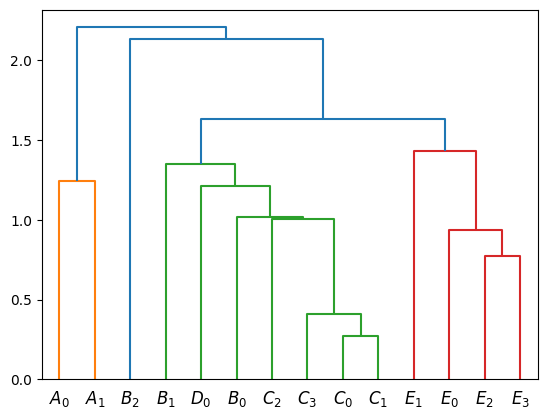

Noise 0.6000000000000001:


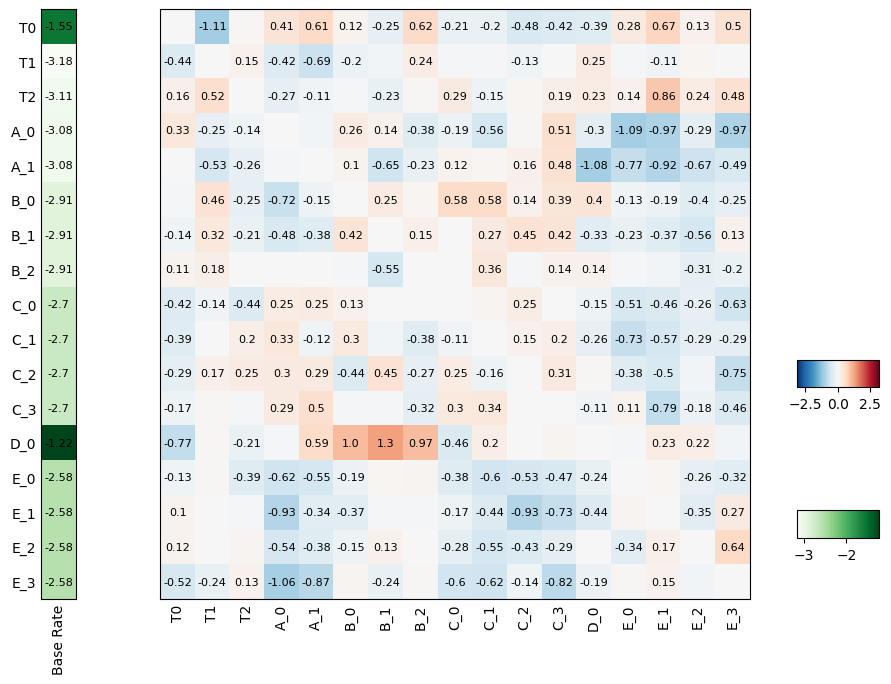

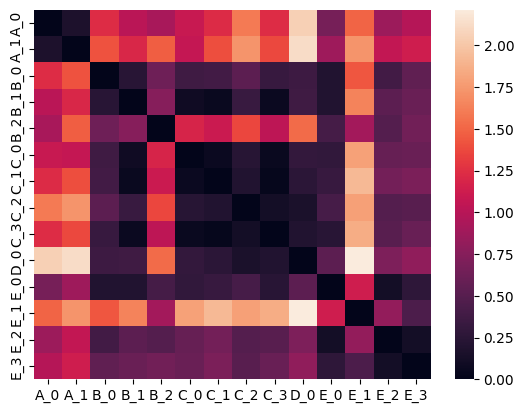

C:\Users\michi\AppData\Local\Temp\ipykernel_28936\636595382.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)


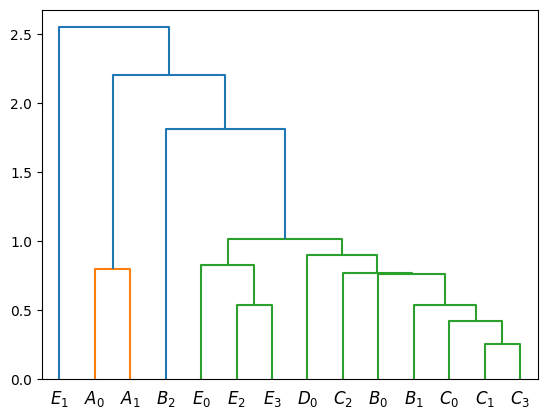

Noise 0.7000000000000001:


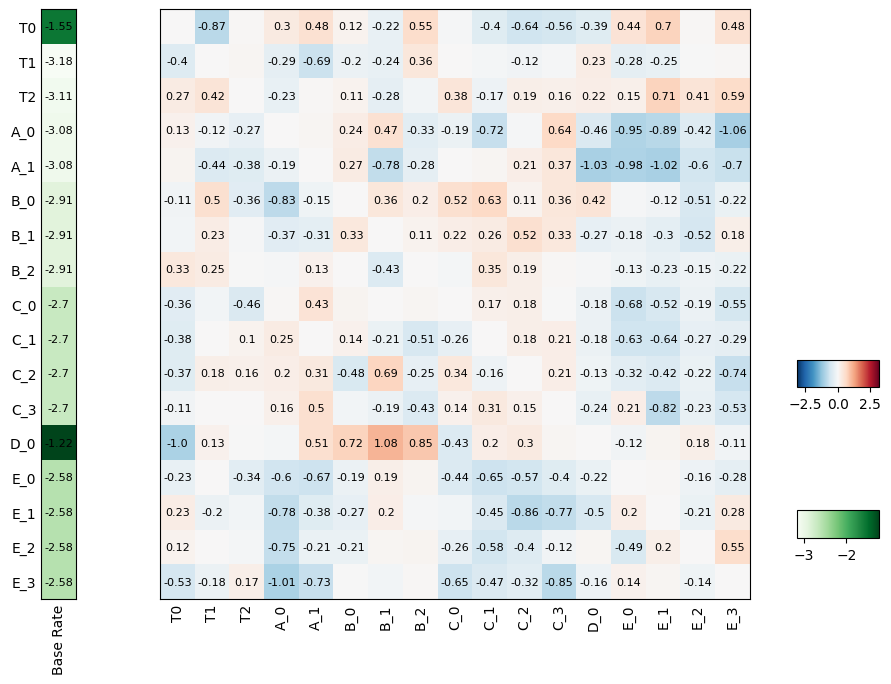

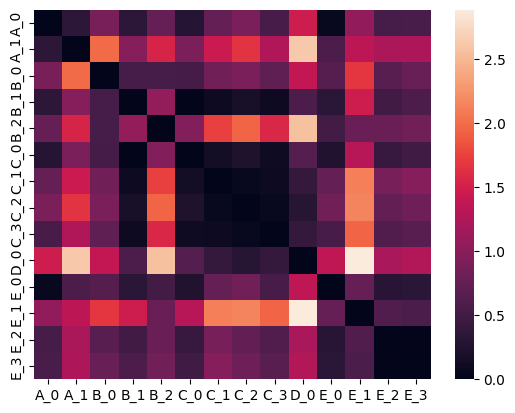

C:\Users\michi\AppData\Local\Temp\ipykernel_28936\636595382.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)


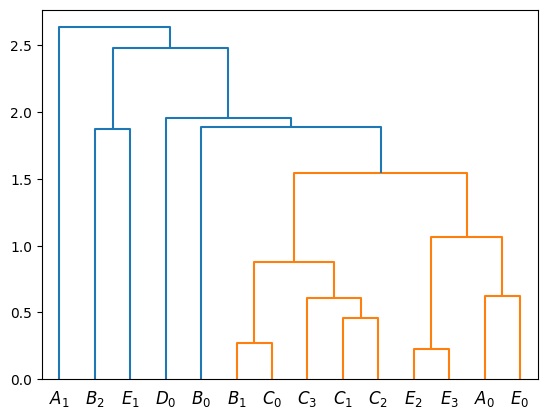

Noise 0.8:


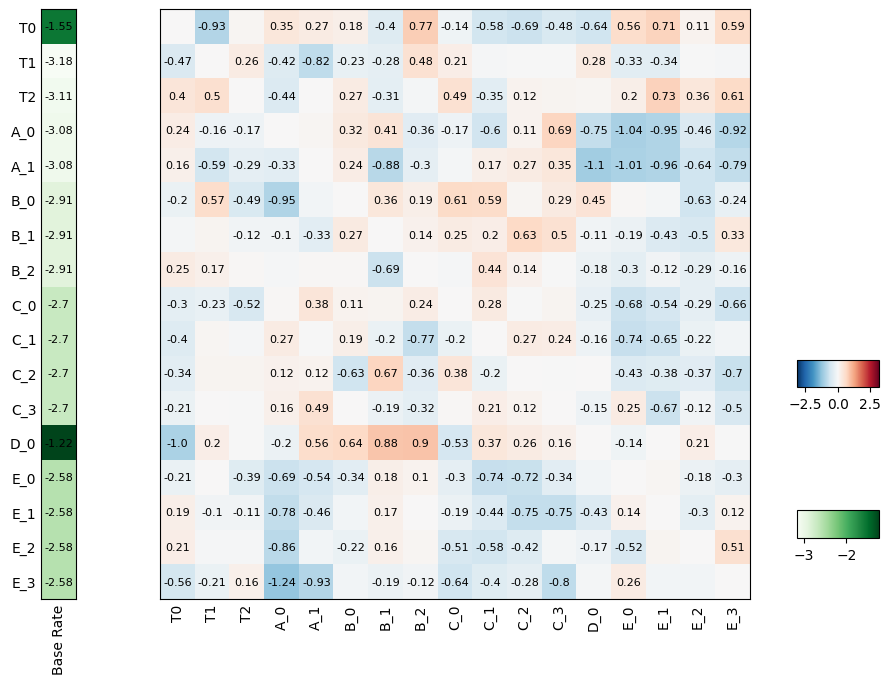

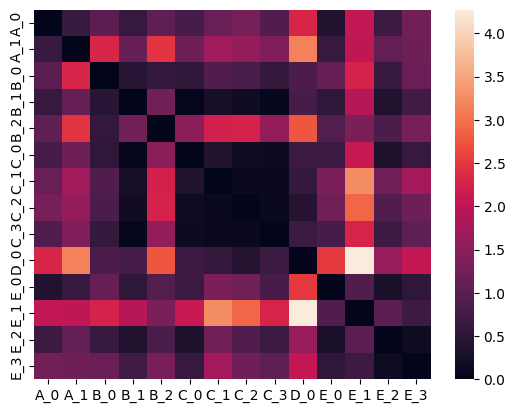

C:\Users\michi\AppData\Local\Temp\ipykernel_28936\636595382.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)


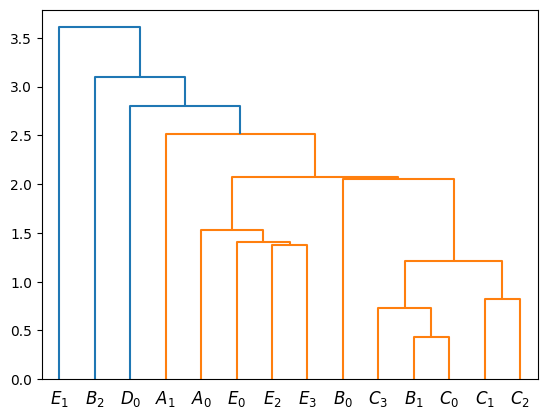

Noise 0.9:


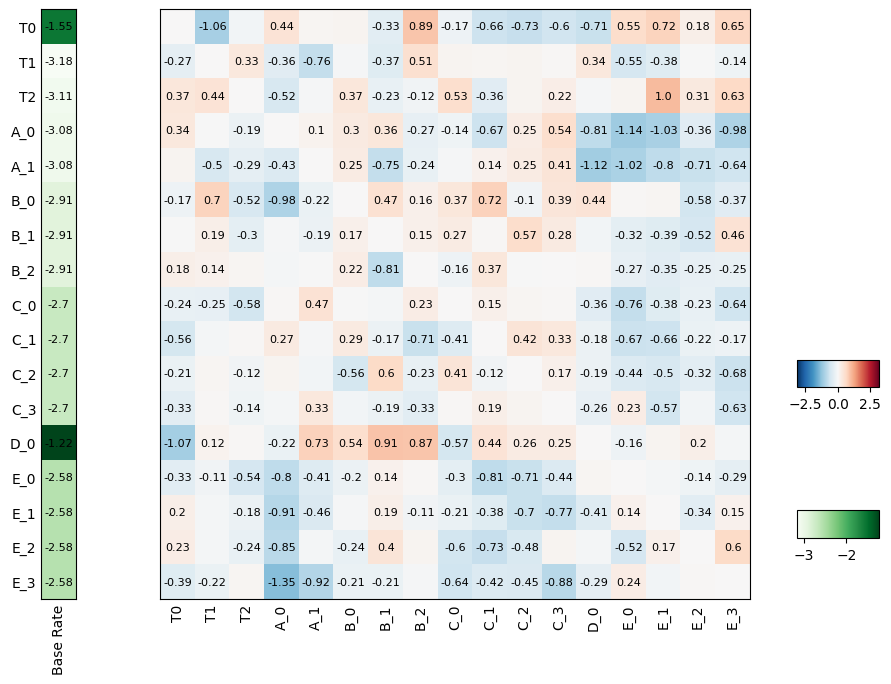

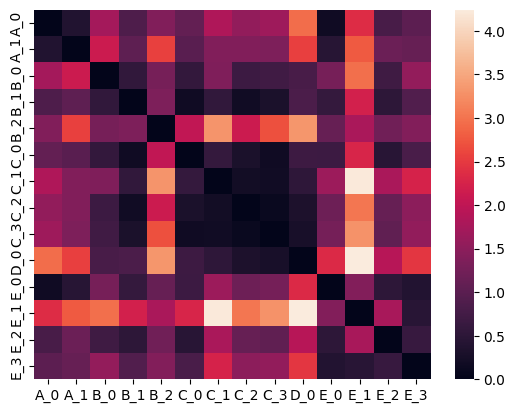

C:\Users\michi\AppData\Local\Temp\ipykernel_28936\636595382.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)


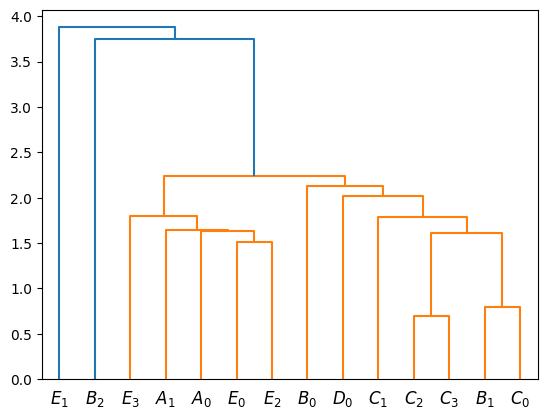

In [7]:
#look at clusters

for i,dist_measurer in enumerate(dist_measurers):
    print(f"Noise {i*noise_inc}:")
    noisy_mhns[i].plot()
    plt.show()
    sns.heatmap(dist_measurer._dist_mat)
    plt.show()
    linkage = scipy.cluster.hierarchy.linkage(dist_measurer._dist_mat)
    scipy.cluster.hierarchy.dendrogram(linkage, labels= [f"${ev}$" for ev in dist_measurer._events])
    plt.show()